In [14]:
import matplotlib.pyplot as plt
import numpy as np 

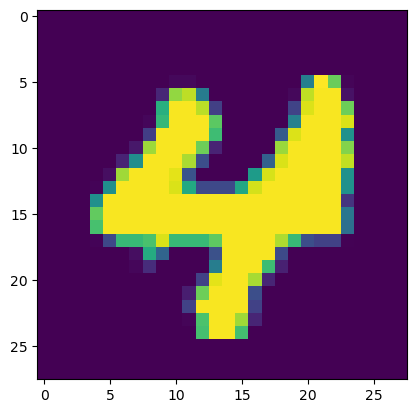

(1000, 784)


In [42]:
train_images = np.load("data/train_images.npy")
train_labels = np.load("data/train_labels.npy").astype(np.int8)
test_images = np.load("data/test_images.npy")
test_labels = np.load("data/test_labels.npy").astype(np.int8)

image = train_images[0, :] # the first image
image = np.reshape(image, (28, 28)) 
plt.imshow(np.uint8(image))
plt.show()
print(train_images.shape)


In [48]:
class KnnClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    def classify_image(self, test_image, num_neighbours = 3, metric = 'l2'):
        if metric == 'l1':
            distances = np.sum(abs(self.train_images - test_image), axis=1)
        elif metric == 'l2':
            distances = np.sqrt(np.sum((self.train_images - test_image)**2, axis=1)) 
        else:
            raise ValueError("Metoda de distanta trebuie sa fie l1 sau l2")

        nearest_indeces = np.argsort(distances)[:num_neighbours]
        nearest_labels = self.train_labels[nearest_indeces]

        counts = np.bincount(nearest_labels)
        return np.argmax(counts)
    
    def classify_images(self, test_images, num_neighbours = 3, metric = 'l2'):
        if metric != 'l1' and metric != 'l2':
            raise ValueError("Metoda de distanta trebuie sa fie l1 sau l2")
        
        predictions = []
        for test_image in test_images:
            pred = KnnClassifier.classify_image(self, test_image, num_neighbours, metric)
            predictions.append(pred)
        
        predictions = np.array(predictions)
        np.savetxt("predictii_3nn_l2_mnist.txt", predictions.astype(np.int8), fmt='%d')
        accuracy = np.mean(predictions == test_labels)

        return accuracy

In [40]:
knn = KnnClassifier(train_images, train_labels)
acc = knn.classify_images(test_images)
print(f"{acc*100}%")

89.8%


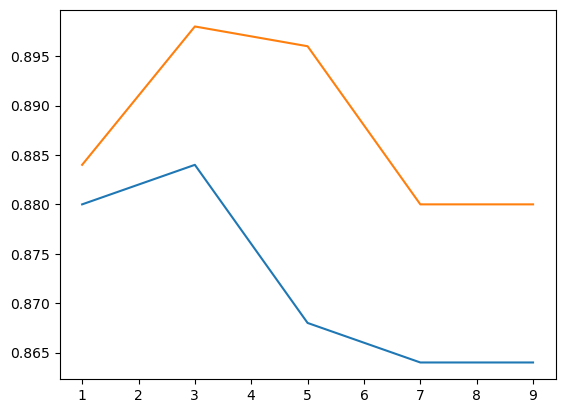

In [52]:
knn = KnnClassifier(train_images, train_labels)
accuracies_l1 = []
accuracies_l2 = []
for k in [1, 3, 5, 7, 9]:
    acc_l1 = knn.classify_images(test_images, k, metric='l1')
    acc_l2 = knn.classify_images(test_images, k, metric='l2')
    accuracies_l1.append(acc_l1)
    accuracies_l2.append(acc_l2)
np.savetxt('acuratete_l2.txt', accuracies_l2)
plt.plot([1,3,5,7,9], accuracies_l1, label='L1')
plt.plot([1,3,5,7,9], accuracies_l2, label='L2')
plt.show()